# Import Libraries

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [9]:
df  = pd.read_csv('diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [11]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Train Test Split

In [12]:
x = df.drop('Outcome',axis=1)
y = df['Outcome']

In [13]:
# Train Test Split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1, stratify=y)

In [14]:
y_train.value_counts()

0    400
1    214
Name: Outcome, dtype: int64

# Train Model

In [15]:
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train,y_train)

DecisionTreeClassifier()

In [16]:
y_test.shape

(154,)

In [17]:
# Testing Accuracy
y_pred = dt_model.predict(x_test)
test_accuracy = accuracy_score(y_test, y_pred)
print('Test Data Accuracy is:\n',test_accuracy)

clf_report = classification_report(y_test, y_pred)
print('Classification Report :\n',clf_report)

cnf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix :\n',cnf_matrix)

Test Data Accuracy is:
 0.7077922077922078
Classification Report :
               precision    recall  f1-score   support

           0       0.76      0.81      0.78       100
           1       0.60      0.52      0.55        54

    accuracy                           0.71       154
   macro avg       0.68      0.66      0.67       154
weighted avg       0.70      0.71      0.70       154

Confusion Matrix :
 [[81 19]
 [26 28]]


In [18]:
# Training Accuracy
y_pred_train = dt_model.predict(x_train)
test_accuracy = accuracy_score(y_train, y_pred_train)
print('Test Data Accuracy is:\n',test_accuracy)

clf_report = classification_report(y_train, y_pred_train)
print('Classification Report :\n',clf_report)

cnf_matrix = confusion_matrix(y_train, y_pred_train)
print('Confusion Matrix :\n',cnf_matrix)

Test Data Accuracy is:
 1.0
Classification Report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       400
           1       1.00      1.00      1.00       214

    accuracy                           1.00       614
   macro avg       1.00      1.00      1.00       614
weighted avg       1.00      1.00      1.00       614

Confusion Matrix :
 [[400   0]
 [  0 214]]


## Plot Decision Tree

[Text(2364.2056002475247, 5276.117647058823, 'Glucose <= 127.5\ngini = 0.454\nsamples = 614\nvalue = [400, 214]\nclass = 0'), Text(866.2639232673267, 4956.35294117647, 'Age <= 28.5\ngini = 0.303\nsamples = 382\nvalue = [311, 71]\nclass = 0'), Text(469.6039603960396, 4636.588235294118, 'BMI <= 45.4\ngini = 0.14\nsamples = 211\nvalue = [195, 16]\nclass = 0'), Text(359.1089108910891, 4316.823529411765, 'Pregnancies <= 7.5\ngini = 0.126\nsamples = 208\nvalue = [194, 14]\nclass = 0'), Text(303.86138613861385, 3997.0588235294117, 'BMI <= 31.3\ngini = 0.118\nsamples = 207\nvalue = [194, 13]\nclass = 0'), Text(110.4950495049505, 3677.294117647059, 'DiabetesPedigreeFunction <= 0.672\ngini = 0.017\nsamples = 117\nvalue = [116, 1]\nclass = 0'), Text(55.24752475247525, 3357.529411764706, 'gini = 0.0\nsamples = 102\nvalue = [102, 0]\nclass = 0'), Text(165.74257425742576, 3357.529411764706, 'DiabetesPedigreeFunction <= 0.686\ngini = 0.124\nsamples = 15\nvalue = [14, 1]\nclass = 0'), Text(110.4950495

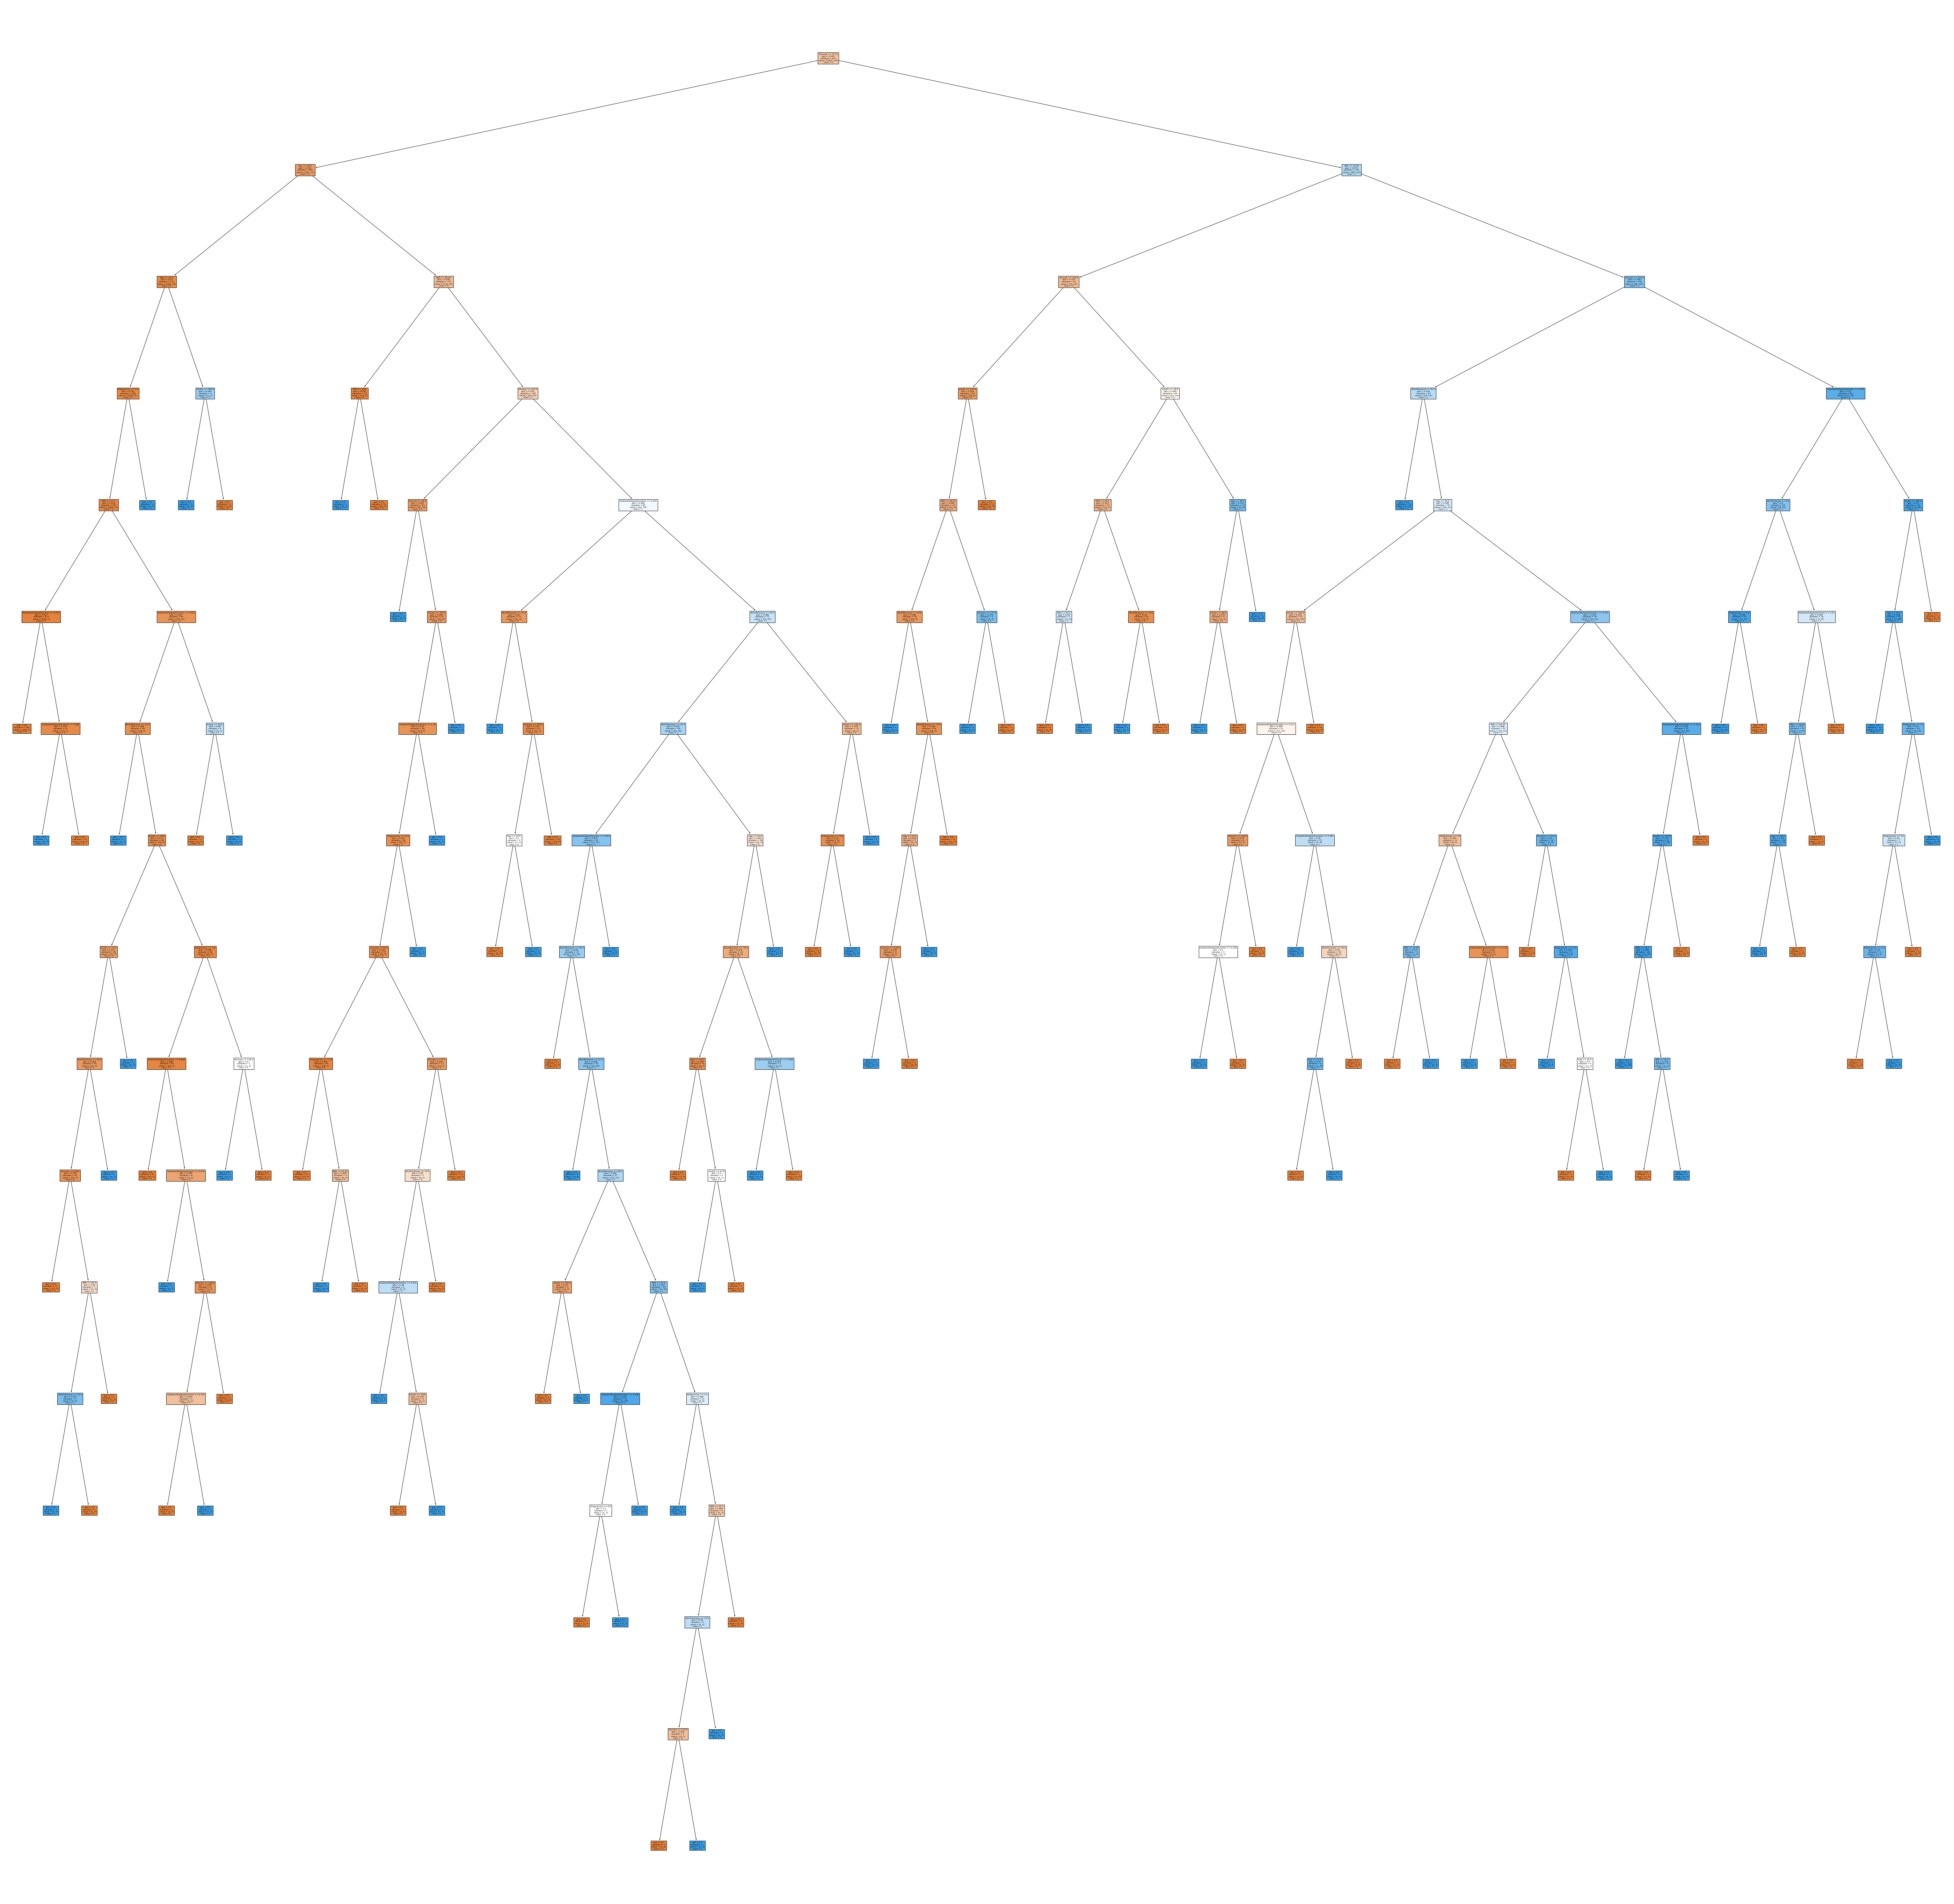

In [12]:
plt.figure(figsize=(100,100))
tree = plot_tree(decision_tree=dt_model, feature_names= df.columns, class_names=['0','1'],filled=True)
print(tree)
plt.savefig('Decision_Tree.png')

In [19]:
dt_model = DecisionTreeClassifier(max_depth=4)
dt_model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=4)

In [20]:
# Testing Accuracy
y_pred = dt_model.predict(x_test)
test_accuracy = accuracy_score(y_test, y_pred)
print('Test Data Accuracy is:\n',test_accuracy)

clf_report = classification_report(y_test, y_pred)
print('Classification Report :\n',clf_report)

cnf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix :\n',cnf_matrix)

Test Data Accuracy is:
 0.7532467532467533
Classification Report :
               precision    recall  f1-score   support

           0       0.85      0.75      0.80       100
           1       0.62      0.76      0.68        54

    accuracy                           0.75       154
   macro avg       0.74      0.75      0.74       154
weighted avg       0.77      0.75      0.76       154

Confusion Matrix :
 [[75 25]
 [13 41]]


In [21]:
# Training Accuracy
y_pred_train = dt_model.predict(x_train)
test_accuracy = accuracy_score(y_train, y_pred_train)
print('Test Data Accuracy is:\n',test_accuracy)

clf_report = classification_report(y_train, y_pred_train)
print('Classification Report :\n',clf_report)

cnf_matrix = confusion_matrix(y_train, y_pred_train)
print('Confusion Matrix :\n',cnf_matrix)

Test Data Accuracy is:
 0.7980456026058632
Classification Report :
               precision    recall  f1-score   support

           0       0.90      0.78      0.83       400
           1       0.67      0.84      0.74       214

    accuracy                           0.80       614
   macro avg       0.78      0.81      0.79       614
weighted avg       0.82      0.80      0.80       614

Confusion Matrix :
 [[310  90]
 [ 34 180]]


In [16]:
plt.figure(figsize=(200,100))
tree = plot_tree(decision_tree=dt_model, feature_names= df.columns, class_names=['0','1'],filled=True)
print(tree)
plt.savefig('Decision_Tree_2.png')

[Text(5580.0, 4892.4, 'Glucose <= 127.5\ngini = 0.454\nsamples = 614\nvalue = [400, 214]\nclass = 0'), Text(2790.0, 3805.2, 'Age <= 28.5\ngini = 0.303\nsamples = 382\nvalue = [311, 71]\nclass = 0'), Text(1395.0, 2718.0, 'BMI <= 45.4\ngini = 0.14\nsamples = 211\nvalue = [195, 16]\nclass = 0'), Text(697.5, 1630.7999999999997, 'Pregnancies <= 7.5\ngini = 0.126\nsamples = 208\nvalue = [194, 14]\nclass = 0'), Text(348.75, 543.5999999999995, 'gini = 0.118\nsamples = 207\nvalue = [194, 13]\nclass = 0'), Text(1046.25, 543.5999999999995, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = 1'), Text(2092.5, 1630.7999999999997, 'BloodPressure <= 99.0\ngini = 0.444\nsamples = 3\nvalue = [1, 2]\nclass = 1'), Text(1743.75, 543.5999999999995, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]\nclass = 1'), Text(2441.25, 543.5999999999995, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = 0'), Text(4185.0, 2718.0, 'BMI <= 26.35\ngini = 0.436\nsamples = 171\nvalue = [116, 55]\nclass = 0'), Text(3487.5, 1630.799999

## Hyperparameters Tuning

## 1. GridSearchCV

In [18]:
dt_model = DecisionTreeClassifier()
hyp = {'criterion':['gini','entropy'], 'max_depth':np.arange(3,12),
       'min_samples_split': np.arange(2,20), # branch node
      'min_samples_leaf':np.arange(1,15), # leaf node
       'random_state':np.arange(1,20)} 

gscv_dt_model = GridSearchCV(dt_model , hyp, cv =5)
gscv_dt_model.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11]),
                         'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                         'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19]),
                         'random_state': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})

In [19]:
gscv_dt_model.best_params_

{'criterion': 'gini',
 'max_depth': 7,
 'min_samples_leaf': 6,
 'min_samples_split': 17,
 'random_state': 19}

In [20]:
# Testing Accuracy
y_pred = gscv_dt_model.predict(x_test)
test_accuracy = accuracy_score(y_test, y_pred)
print('Test Data Accuracy is:\n',test_accuracy)

clf_report = classification_report(y_test, y_pred)
print('Classification Report :\n',clf_report)

cnf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix :\n',cnf_matrix)

Test Data Accuracy is:
 0.7597402597402597
Classification Report :
               precision    recall  f1-score   support

           0       0.79      0.86      0.82       100
           1       0.69      0.57      0.63        54

    accuracy                           0.76       154
   macro avg       0.74      0.72      0.72       154
weighted avg       0.75      0.76      0.75       154

Confusion Matrix :
 [[86 14]
 [23 31]]


In [21]:
# Training Accuracy
y_pred_train = gscv_dt_model.predict(x_train)
test_accuracy = accuracy_score(y_train, y_pred_train)
print('Test Data Accuracy is:\n',test_accuracy)

clf_report = classification_report(y_train, y_pred_train)
print('Classification Report :\n',clf_report)

cnf_matrix = confusion_matrix(y_train, y_pred_train)
print('Confusion Matrix :\n',cnf_matrix)

Test Data Accuracy is:
 0.8485342019543974
Classification Report :
               precision    recall  f1-score   support

           0       0.87      0.90      0.89       400
           1       0.80      0.76      0.78       214

    accuracy                           0.85       614
   macro avg       0.84      0.83      0.83       614
weighted avg       0.85      0.85      0.85       614

Confusion Matrix :
 [[359  41]
 [ 52 162]]


## Pruning

In [ ]:
1. Cutting the trees
2. Remove unwanted/weak nodes
3. Pre pruning
   Post Pruning
    
ccp_alpha >> cost_complexity_pruning

In [49]:
dt_model = DecisionTreeClassifier(random_state=1,ccp_alpha=0.0)
dt_model.fit(x_train, y_train)

DecisionTreeClassifier(random_state=1)

In [50]:
values = dt_model.cost_complexity_pruning_path(x_train,y_train)
values
ccp_alpha_list = values['ccp_alphas']
ccp_alpha_list

array([0.        , 0.00135722, 0.00142508, 0.0014477 , 0.0014477 ,
       0.0014806 , 0.00149294, 0.00154723, 0.00157438, 0.00160409,
       0.00161474, 0.00175434, 0.00193027, 0.0019544 , 0.00217155,
       0.00217155, 0.0021987 , 0.00226203, 0.00230205, 0.00231632,
       0.00238505, 0.00243823, 0.002443  , 0.002443  , 0.002443  ,
       0.00252652, 0.00257255, 0.00260586, 0.00260586, 0.0026152 ,
       0.00263506, 0.00267249, 0.0027115 , 0.00283775, 0.00284001,
       0.00285016, 0.0029316 , 0.0029316 , 0.0029316 , 0.00300677,
       0.00315862, 0.00327295, 0.00339305, 0.00346049, 0.0037484 ,
       0.00384586, 0.00391397, 0.00427404, 0.00428243, 0.00463828,
       0.00481021, 0.00500358, 0.00500745, 0.00661636, 0.00778397,
       0.00821741, 0.01140636, 0.01858956, 0.02517158, 0.0871409 ])

In [51]:
train_accuracy = []
test_accuracy = []

for ccp_alpha_iteration in ccp_alpha_list:
    print(ccp_alpha_iteration)
    dt_model = DecisionTreeClassifier(ccp_alpha=ccp_alpha_iteration)
    dt_model.fit(x_train, y_train)
    train_accuracy.append(dt_model.score(x_train, y_train))
    test_accuracy.append(dt_model.score(x_test,y_test))

0.0
0.0013572204125950054
0.0014250814332247557
0.0014477017734346724
0.0014477017734346724
0.0014806040864672788
0.001492942453854506
0.0015472312703583057
0.0015743756786102056
0.0016040941255756492
0.0016147442857540582
0.0017543373299142926
0.0019302690312462299
0.001954397394136808
0.0021715526601520083
0.0021715526601520083
0.0021986970684039087
0.002262034020991676
0.0023020546229015277
0.0023163228374954744
0.002385053014054474
0.0024382345657847125
0.0024429967426710096
0.0024429967426710096
0.0024429967426710096
0.0025265179988307024
0.0025725496002368953
0.0026058631921824097
0.0026058631921824097
0.0026151981341431194
0.0026350605388735238
0.0026724903760734385
0.002711499480642591
0.0028377528684823926
0.0028400052337632826
0.0028501628664495114
0.0029315960912052125
0.0029315960912052125
0.0029315960912052125
0.0030067652217489337
0.0031586220511301923
0.0032729482839657237
0.0033930510314875125
0.003460491477071448
0.00374839601223966
0.003845856928664737
0.0039139651517

In [52]:
print(train_accuracy)

[1.0, 0.998371335504886, 0.996742671009772, 0.993485342019544, 0.993485342019544, 0.99185667752443, 0.990228013029316, 0.988599348534202, 0.9869706840390879, 0.9837133550488599, 0.9820846905537459, 0.9771986970684039, 0.9739413680781759, 0.9706840390879479, 0.9674267100977199, 0.9674267100977199, 0.9657980456026058, 0.9690553745928339, 0.9592833876221498, 0.9576547231270358, 0.9495114006514658, 0.9478827361563518, 0.9429967426710097, 0.9478827361563518, 0.9429967426710097, 0.9462540716612378, 0.9462540716612378, 0.9348534201954397, 0.9429967426710097, 0.9397394136807817, 0.9299674267100977, 0.9348534201954397, 0.9315960912052117, 0.9218241042345277, 0.9136807817589576, 0.9120521172638436, 0.9071661237785016, 0.9071661237785016, 0.9071661237785016, 0.9055374592833876, 0.9039087947882736, 0.8973941368078175, 0.8941368078175895, 0.8925081433224755, 0.8859934853420195, 0.8762214983713354, 0.8631921824104235, 0.8534201954397395, 0.8469055374592834, 0.8403908794788274, 0.8273615635179153, 0.

In [53]:
print(test_accuracy)

[0.7272727272727273, 0.6818181818181818, 0.7012987012987013, 0.7077922077922078, 0.7142857142857143, 0.6948051948051948, 0.7142857142857143, 0.7272727272727273, 0.7142857142857143, 0.7272727272727273, 0.7077922077922078, 0.7077922077922078, 0.6948051948051948, 0.7012987012987013, 0.7142857142857143, 0.7272727272727273, 0.7142857142857143, 0.6883116883116883, 0.7077922077922078, 0.7012987012987013, 0.7207792207792207, 0.7142857142857143, 0.7207792207792207, 0.7207792207792207, 0.7012987012987013, 0.7142857142857143, 0.7207792207792207, 0.7337662337662337, 0.7207792207792207, 0.7402597402597403, 0.7077922077922078, 0.7142857142857143, 0.7402597402597403, 0.7337662337662337, 0.7207792207792207, 0.7077922077922078, 0.7012987012987013, 0.7077922077922078, 0.7012987012987013, 0.7077922077922078, 0.7272727272727273, 0.7272727272727273, 0.7337662337662337, 0.7272727272727273, 0.7272727272727273, 0.7467532467532467, 0.7597402597402597, 0.7727272727272727, 0.7662337662337663, 0.7662337662337663,

In [54]:
max(train_accuracy)

1.0

In [55]:
max(test_accuracy)

0.7727272727272727

In [56]:
test_accuracy.index(max(test_accuracy))

47

In [59]:
ccp_alpha_list[47]

0.004274040615823919

In [60]:
train_accuracy[47]

0.8534201954397395

In [40]:
ccp_alpha_list.shape

(58,)

In [61]:
dt_model = DecisionTreeClassifier(random_state=1,ccp_alpha=ccp_alpha_list[47])
dt_model.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.004274040615823919, random_state=1)

In [63]:
# Testing Accuracy
y_pred = dt_model.predict(x_test)
test_accuracy = accuracy_score(y_test, y_pred)
print('Test Data Accuracy is:\n',test_accuracy)

clf_report = classification_report(y_test, y_pred)
print('Classification Report :\n',clf_report)

cnf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix :\n',cnf_matrix)

Test Data Accuracy is:
 0.7727272727272727
Classification Report :
               precision    recall  f1-score   support

           0       0.80      0.86      0.83       100
           1       0.70      0.61      0.65        54

    accuracy                           0.77       154
   macro avg       0.75      0.74      0.74       154
weighted avg       0.77      0.77      0.77       154

Confusion Matrix :
 [[86 14]
 [21 33]]


In [64]:
# Training Accuracy
y_pred_train = dt_model.predict(x_train)
test_accuracy = accuracy_score(y_train, y_pred_train)
print('Test Data Accuracy is:\n',test_accuracy)

clf_report = classification_report(y_train, y_pred_train)
print('Classification Report :\n',clf_report)

cnf_matrix = confusion_matrix(y_train, y_pred_train)
print('Confusion Matrix :\n',cnf_matrix)

Test Data Accuracy is:
 0.8534201954397395
Classification Report :
               precision    recall  f1-score   support

           0       0.89      0.89      0.89       400
           1       0.79      0.79      0.79       214

    accuracy                           0.85       614
   macro avg       0.84      0.84      0.84       614
weighted avg       0.85      0.85      0.85       614

Confusion Matrix :
 [[354  46]
 [ 44 170]]
